In [1]:
import pandas as pd
import numpy as np
import math
import random
import csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from time import time

In [50]:
#url = "D:\\TUGAS AKHIR\\Data TA\\data3.csv"
#colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','y']

url = "D:\\TUGAS AKHIR\\Data TA\\Australian fraud dataset\\australian.csv"
colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14', 'y']

##url = "D:\\TUGAS AKHIR\\Data TA\\German fraud dataset\\german.csv"
##colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','y']

data = pd.read_csv(url, header = None, names = colnames)
#data = data.sample(n=10000, random_state = 42)
data["y"].value_counts()

0    383
1    307
Name: y, dtype: int64

In [51]:
X = data.drop('y', axis = 1)
X = (X-X.mean())/X.std()
y = data['y']

In [46]:
#################### I N P U T ####################
#berdasarkan buku
#khi = 0.729
#c1 = 2.05
#c2 = 2.05

#berdasarkan paper
K = 0.3
c1 = 2.05
c2 = 2.05
c = c1 + c2
khi = 2*K/(abs(2-c-math.sqrt(c**2-4*c)))
n_iterations = 10
n_particles = 100

In [47]:
#mencari nilai 0-1 loss dari tiap partikel
#partikle = (gamma,C) untuk rbf
def fitness_function(position):
    kf = KFold(n_splits = 3)
    svclassifier = SVC(kernel='rbf', gamma = position[0], C = position[1] )  
   # svclassifier.fit(X_train, y_train)
    scores = cross_val_score(svclassifier, X, y, cv = kf, scoring = 'roc_auc')
    return np.mean(scores)
   # y_train_pred = svclassifier.predict(X_train)
   # y_test_pred = svclassifier.predict(X_test)   
   # return (confusion_matrix(y_train,y_train_pred)[0][1] + confusion_matrix(y_train,y_train_pred)[1][0])/np.sum(confusion_matrix(y_train,y_train_pred)), (confusion_matrix(y_test,y_test_pred)[0][1] + confusion_matrix(y_test,y_test_pred)[1][0])/np.sum(confusion_matrix(y_test,y_test_pred))

#plotting (x axis = gamma, y axis = C)
def plot(position):
    x = []
    y = []
    for i in range(0,len(particle_position_vector)):
        x.append(particle_position_vector[i][0])
        y.append(particle_position_vector[i][1])
    colors = (0,0,0)
    plt.scatter(x, y, c = colors, alpha = 0.3)
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.axis([-1,11,-1,11])
    plt.gca().set_aspect('equal', adjustable='box')
    return plt.show()

for i in range(n_particles):
    max_velocity = np.array([10,10])
    min_velocity = np.array([-10,-10])
    max_position = np.array([10,10])
    min_position = np.array([0.0001, 0.001])

def eval_velocity(new_velocity):
    for j in range(0,2):
        if(new_velocity[j] > max_velocity[j]):
            new_velocity[j] = max_velocity[j]
        elif(new_velocity[j] < min_velocity[j]):
            new_velocity[j] = min_velocity[j]
    return new_velocity

def eval_position(particle_position_vector):
    for j in range(0,2):
        if(particle_position_vector[j] > max_position[j]):
            particle_position_vector[j] = max_position[j]
        elif(particle_position_vector[j] < min_position[j]):
            particle_position_vector[j] = min_position[j]
    return particle_position_vector
        

In [48]:
particle_position_vector = np.array([np.array([random.random()*10, random.random()*10]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([0 for _ in range(n_particles)])
gbest_fitness_value = np.array([0])
gbest_position = np.array([float('inf'), float('inf')])
velocity_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1)))*random.random()*2,(-1) ** (bool(random.getrandbits(1))) * random.random()*2]) for _ in range(n_particles)])
#velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


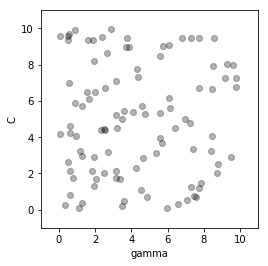

AUC for particle - 1 is 0.8255990672821435  At (gamma, c):  [1.8210889  2.14115978] .. Time =  0.13998746871948242
AUC for particle - 2 is 0.8054232309609698  At (gamma, c):  [8.46833626 6.64883017] .. Time =  0.13898777961730957
AUC for particle - 3 is 0.8199484081298495  At (gamma, c):  [4.06470138 5.38162089] .. Time =  0.16295480728149414
AUC for particle - 4 is 0.8638194386880548  At (gamma, c):  [0.63559822 0.79096278] .. Time =  0.13699889183044434
AUC for particle - 5 is 0.8230240701146526  At (gamma, c):  [2.33025154 4.40759883] .. Time =  0.14199328422546387
AUC for particle - 6 is 0.8117473065578983  At (gamma, c):  [6.76406149 9.47890054] .. Time =  0.1679530143737793
AUC for particle - 7 is 0.8177088092862442  At (gamma, c):  [4.63122297 2.86718267] .. Time =  0.16700077056884766
AUC for particle - 8 is 0.8046940882792598  At (gamma, c):  [8.52407802 7.92055985] .. Time =  0.13896894454956055
AUC for particle - 9 is 0.8208177947362844  At (gamma, c):  [3.16507007 1.7442488

AUC for particle - 73 is 0.8239417241391914  At (gamma, c):  [2.03191917 1.69161511] .. Time =  0.13895583152770996
AUC for particle - 74 is 0.8351364026768126  At (gamma, c):  [1.14978711 3.25643663] .. Time =  0.15200281143188477
AUC for particle - 75 is 0.8053720630534814  At (gamma, c):  [8.44602582 4.04874562] .. Time =  0.1549990177154541
AUC for particle - 76 is 0.8072156983140175  At (gamma, c):  [7.74892164 1.18416493] .. Time =  0.13898634910583496
AUC for particle - 77 is 0.8107886568058799  At (gamma, c):  [6.56640105 0.32666721] .. Time =  0.12899088859558105
AUC for particle - 78 is 0.8208814739281237  At (gamma, c):  [3.19994411 4.48878898] .. Time =  0.14096879959106445
AUC for particle - 79 is 0.8488997423330372  At (gamma, c):  [0.5458854  9.68493627] .. Time =  0.14200687408447266
AUC for particle - 80 is 0.8229225763772391  At (gamma, c):  [2.47532852 2.03216103] .. Time =  0.17399859428405762
AUC for particle - 81 is 0.8219913818624388  At (gamma, c):  [2.72243976 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 1 is [0.06325641 4.19628449] with AUC: 0.909949716566341
15.356862545013428


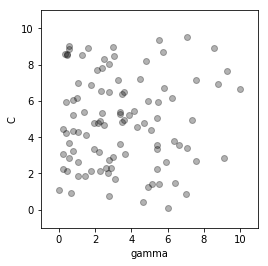

AUC for particle - 1 is 0.8365661100329302  At (gamma, c):  [1.07655395 2.60678444] .. Time =  0.12897276878356934
AUC for particle - 2 is 0.8170840608313323  At (gamma, c):  [4.93331527 5.97356593] .. Time =  0.16295647621154785
AUC for particle - 3 is 0.8206261957757238  At (gamma, c):  [3.35352843 5.25296257] .. Time =  0.17199373245239258
AUC for particle - 4 is 0.8622324850425241  At (gamma, c):  [0.65124205 0.93356335] .. Time =  0.12400507926940918
AUC for particle - 5 is 0.8300823817929966  At (gamma, c):  [1.47893202 4.10319696] .. Time =  0.13600659370422363
AUC for particle - 6 is 0.810688192274377  At (gamma, c):  [7.07511559 9.54603536] .. Time =  0.14498543739318848
AUC for particle - 7 is 0.8214561772456315  At (gamma, c):  [2.99955351 2.92959856] .. Time =  0.1509695053100586
AUC for particle - 8 is 0.8086822845739722  At (gamma, c):  [7.56726365 7.15172323] .. Time =  0.139970064163208
AUC for particle - 9 is 0.8219915689907861  At (gamma, c):  [2.73819813 2.75513719] 

AUC for particle - 73 is 0.8263385692722096  At (gamma, c):  [1.75989036 2.13495507] .. Time =  0.14196991920471191
AUC for particle - 74 is 0.8436886622881558  At (gamma, c):  [0.78479458 3.25782003] .. Time =  0.1269843578338623
AUC for particle - 75 is 0.8137758977226627  At (gamma, c):  [6.34104756 3.80050771] .. Time =  0.16298437118530273
AUC for particle - 76 is 0.8139664674773125  At (gamma, c):  [6.40100974 1.46516789] .. Time =  0.1469876766204834
AUC for particle - 77 is 0.8166900357809869  At (gamma, c):  [5.12413293 1.40628937] .. Time =  0.15395832061767578
AUC for particle - 78 is 0.8229467568683778  At (gamma, c):  [2.27039487 4.89732153] .. Time =  0.13496971130371094
AUC for particle - 79 is 0.852680553636759  At (gamma, c):  [0.42560637 8.56209598] .. Time =  0.13095569610595703
AUC for particle - 80 is 0.8231380751364172  At (gamma, c):  [2.28883512 2.12896268] .. Time =  0.13795876502990723
AUC for particle - 81 is 0.8230737409953619  At (gamma, c):  [2.22455228 3.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


 100 is 0.8156439006026849  At (gamma, c):  [5.52701261 1.39183703] .. Time =  0.17496943473815918
The best position in iteration number 2 is [1.00000000e-04 1.07185882e+00] with AUC: 0.92198770069698
15.401821851730347


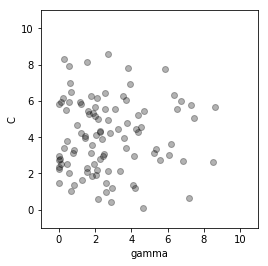

AUC for particle - 1 is 0.8605650369688131  At (gamma, c):  [0.56334703 2.01324421] .. Time =  0.13297033309936523
AUC for particle - 2 is 0.8217746667690023  At (gamma, c):  [2.79046241 4.24290811] .. Time =  0.14196205139160156
AUC for particle - 3 is 0.8229209857862863  At (gamma, c):  [2.25469087 4.2708163 ] .. Time =  0.14297056198120117
AUC for particle - 4 is 0.8602897887130906  At (gamma, c):  [0.66675024 1.03913619] .. Time =  0.12397122383117676
AUC for particle - 5 is 0.8426569096776788  At (gamma, c):  [0.81522505 3.27318477] .. Time =  0.1389603614807129
AUC for particle - 6 is 0.8150677938225716  At (gamma, c):  [5.86845939 7.77129689] .. Time =  0.18601083755493164
AUC for particle - 7 is 0.8259561198644781  At (gamma, c):  [1.80077971 1.83916414] .. Time =  0.13997268676757812
AUC for particle - 8 is 0.8117093048839767  At (gamma, c):  [6.74464646 6.00602785] .. Time =  0.1409904956817627
AUC for particle - 9 is 0.8247060615696121  At (gamma, c):  [1.92956649 2.5012109 

AUC for particle - 73 is 0.8287333559934066  At (gamma, c):  [1.57271038 2.28617841] .. Time =  0.13798165321350098
AUC for particle - 74 is 0.9081612724727623  At (gamma, c):  [0.09135692 2.49731353] .. Time =  0.08899378776550293
AUC for particle - 75 is 0.8165383097778216  At (gamma, c):  [5.22622902 3.12363223] .. Time =  0.1509852409362793
AUC for particle - 76 is 0.8198208626178233  At (gamma, c):  [4.19998573 1.20464384] .. Time =  0.14997458457946777
AUC for particle - 77 is 0.8198718433969642  At (gamma, c):  [4.09842629 1.38077572] .. Time =  0.15497207641601562
AUC for particle - 78 is 0.8307966740860132  At (gamma, c):  [1.45057323 3.96724924] .. Time =  0.12498998641967773
AUC for particle - 79 is 0.8728010379775518  At (gamma, c):  [0.23745115 6.16326471] .. Time =  0.11696362495422363
AUC for particle - 80 is 0.8241454601274082  At (gamma, c):  [2.08843378 2.21172945] .. Time =  0.1400010585784912
AUC for particle - 81 is 0.8230231344729156  At (gamma, c):  [2.24676416 2

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 3 is [0.00311403 2.26117774] with AUC: 0.9292956766773023
14.655884742736816


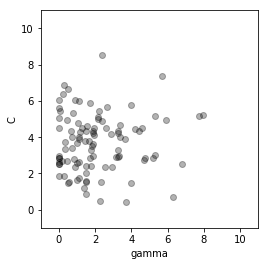

AUC for particle - 1 is 0.8788917031238007  At (gamma, c):  [0.2901781  1.88135994] .. Time =  0.1259899139404297
AUC for particle - 2 is 0.8272312007280463  At (gamma, c):  [1.65070833 3.81405587] .. Time =  0.12798643112182617
AUC for particle - 3 is 0.8232718631331571  At (gamma, c):  [1.90054425 4.22862431] .. Time =  0.13097023963928223
AUC for particle - 4 is 0.8650973264768337  At (gamma, c):  [0.49565063 1.49907732] .. Time =  0.12197160720825195
AUC for particle - 5 is 0.8947161416473873  At (gamma, c):  [0.15785421 2.67414584] .. Time =  0.1149909496307373
AUC for particle - 6 is 0.8152087862606859  At (gamma, c):  [5.70852952 7.38710847] .. Time =  0.15099787712097168
AUC for particle - 7 is 0.8425749182227192  At (gamma, c):  [0.98800406 1.62160616] .. Time =  0.13297629356384277
AUC for particle - 8 is 0.8193234725465902  At (gamma, c):  [4.41586027 4.32122839] .. Time =  0.1489880084991455
AUC for particle - 9 is 0.8268229802382231  At (gamma, c):  [1.68724065 2.8642787 ]

AUC for particle - 72 is 0.8349576892572977  At (gamma, c):  [1.14783331 4.29967007] .. Time =  0.13298487663269043
AUC for particle - 73 is 0.8387048700883377  At (gamma, c):  [0.98206914 2.57793484] .. Time =  0.12995648384094238
AUC for particle - 74 is 0.9220129103940294  At (gamma, c):  [1.00000000e-04 2.51339274e+00] .. Time =  0.10596084594726562
AUC for particle - 75 is 0.8175300958667296  At (gamma, c):  [4.69167005 2.75442238] .. Time =  0.1490015983581543
AUC for particle - 76 is 0.8232281803595641  At (gamma, c):  [2.31283736 1.55387523] .. Time =  0.13699054718017578
AUC for particle - 77 is 0.819922637047758  At (gamma, c):  [3.99775014 1.46209002] .. Time =  0.14096879959106445
AUC for particle - 78 is 0.8361330541027524  At (gamma, c):  [1.08255356 3.98523517] .. Time =  0.12895822525024414
AUC for particle - 79 is 0.8763009871751294  At (gamma, c):  [0.20434501 6.35736025] .. Time =  0.11595916748046875
AUC for particle - 80 is 0.8303120759916524  At (gamma, c):  [1.48

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


AUC for particle - 100 is 0.831126832816172  At (gamma, c):  [1.46647369 1.57047899] .. Time =  0.13698720932006836
The best position in iteration number 4 is [1.00000000e-04 6.02672959e+00] with AUC: 0.9247169501003257
14.109970808029175


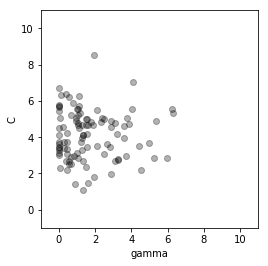

AUC for particle - 1 is 0.9193802776955436  At (gamma, c):  [0.04206963 2.27615071] .. Time =  0.08498668670654297
AUC for particle - 2 is 0.8391642584856492  At (gamma, c):  [0.92947935 5.03877821] .. Time =  0.11997222900390625
AUC for particle - 3 is 0.8360818861952639  At (gamma, c):  [1.07495671 4.69197907] .. Time =  0.12597131729125977
AUC for particle - 4 is 0.8651650961773919  At (gamma, c):  [0.45313413 2.1936489 ] .. Time =  0.12399005889892578
AUC for particle - 5 is 0.9228045159333208  At (gamma, c):  [1.00000000e-04 3.46567808e+00] .. Time =  0.1039896011352539
AUC for particle - 6 is 0.8199230113044527  At (gamma, c):  [4.08448973 7.02536053] .. Time =  0.15298748016357422
AUC for particle - 7 is 0.8486446249940608  At (gamma, c):  [0.87990339 1.39654509] .. Time =  0.12796926498413086
AUC for particle - 8 is 0.8212395557163691  At (gamma, c):  [3.08038813 4.80123399] .. Time =  0.14395451545715332
AUC for particle - 9 is 0.8338056628254188  At (gamma, c):  [1.25030163 4

AUC for particle - 73 is 0.8426557869075944  At (gamma, c):  [0.82732134 2.9442791 ] .. Time =  0.12697958946228027
AUC for particle - 74 is 0.9228045159333208  At (gamma, c):  [1.00000000e-04 3.40810189e+00] .. Time =  0.10197687149047852
AUC for particle - 75 is 0.8201662459933701  At (gamma, c):  [3.69154417 2.93692267] .. Time =  0.15397095680236816
AUC for particle - 76 is 0.8246806647442154  At (gamma, c):  [1.94221708 1.79586373] .. Time =  0.1269702911376953
AUC for particle - 77 is 0.8209454338124843  At (gamma, c):  [3.11756231 2.69173784] .. Time =  0.14397382736206055
AUC for particle - 78 is 0.835570768505422  At (gamma, c):  [1.09494281 4.51659611] .. Time =  0.12895822525024414
AUC for particle - 79 is 0.8973981528385396  At (gamma, c):  [0.09275879 6.350815  ] .. Time =  0.09997320175170898
AUC for particle - 80 is 0.837608315515937  At (gamma, c):  [1.01632486 3.12979821] .. Time =  0.13200116157531738
AUC for particle - 81 is 0.8348028756364009  At (gamma, c):  [1.250

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 5 is [1.00000000e-04 6.69662934e+00] with AUC: 0.9255832490890286
14.015439510345459


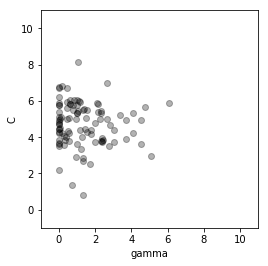

AUC for particle - 1 is 0.9220384943477736  At (gamma, c):  [1.00000000e-04 2.19643085e+00] .. Time =  0.0999913215637207
AUC for particle - 2 is 0.8484889020463507  At (gamma, c):  [0.60963167 5.84052642] .. Time =  0.11999177932739258
AUC for particle - 3 is 0.8516555113318641  At (gamma, c):  [0.53622031 5.08327887] .. Time =  0.1259593963623047
AUC for particle - 4 is 0.8696848480861376  At (gamma, c):  [0.3167576  3.87304097] .. Time =  0.11997079849243164
AUC for particle - 5 is 0.923723854112986  At (gamma, c):  [1.00000000e-04 4.24628073e+00] .. Time =  0.10199451446533203
AUC for particle - 6 is 0.822335736032075  At (gamma, c):  [2.62566045 6.99157664] .. Time =  0.14098763465881348
AUC for particle - 7 is 0.8549436780222873  At (gamma, c):  [0.74734262 1.37734677] .. Time =  0.1399548053741455
AUC for particle - 8 is 0.822972715078817  At (gamma, c):  [2.31405507 5.3234461 ] .. Time =  0.1489558219909668
AUC for particle - 9 is 0.8318887375780767  At (gamma, c):  [1.32401662

AUC for particle - 71 is 0.8244716891622716  At (gamma, c):  [1.76608672 4.40294189] .. Time =  0.16498851776123047
AUC for particle - 72 is 0.8426191886962783  At (gamma, c):  [0.78482854 5.48060508] .. Time =  0.15901875495910645
AUC for particle - 73 is 0.8514723068320121  At (gamma, c):  [0.57703794 3.81401196] .. Time =  0.14400029182434082
AUC for particle - 74 is 0.923033835875282  At (gamma, c):  [1.00000000e-04 3.86626491e+00] .. Time =  0.09397506713867188
AUC for particle - 75 is 0.8229986732892559  At (gamma, c):  [2.34422965 3.77132016] .. Time =  0.13495731353759766
AUC for particle - 76 is 0.8373541601336213  At (gamma, c):  [1.0218733  3.61332063] .. Time =  0.12995433807373047
AUC for particle - 77 is 0.8219913818624387  At (gamma, c):  [2.73530321 3.51816339] .. Time =  0.1469566822052002
AUC for particle - 78 is 0.843539275389333  At (gamma, c):  [0.7536967  5.77233915] .. Time =  0.1279606819152832
AUC for particle - 79 is 0.9183806322160456  At (gamma, c):  [0.0253

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


AUC for particle - 100 is 0.8878249414310201  At (gamma, c):  [0.16083176 4.21528984] .. Time =  0.11498880386352539
The best position in iteration number 6 is [1.00000000e-04 6.79275752e+00] with AUC: 0.9258127561593369
14.331966161727905


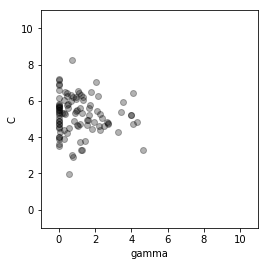

AUC for particle - 1 is 0.9228045159333208  At (gamma, c):  [1.00000000e-04 3.60334079e+00] .. Time =  0.17598915100097656
AUC for particle - 2 is 0.8586518542884188  At (gamma, c):  [0.35152382 6.48829558] .. Time =  0.12897133827209473
AUC for particle - 3 is 0.9184566355638886  At (gamma, c):  [0.02888845 5.66158491] .. Time =  0.10397887229919434
AUC for particle - 4 is 0.8706030634957184  At (gamma, c):  [0.29582629 4.37400387] .. Time =  0.17400050163269043
AUC for particle - 5 is 0.9236982701592419  At (gamma, c):  [1.00000000e-04 4.50305595e+00] .. Time =  0.1060032844543457
AUC for particle - 6 is 0.8238126816003858  At (gamma, c):  [2.05238064 7.03355499] .. Time =  0.13995718955993652
AUC for particle - 7 is 0.8616382531276384  At (gamma, c):  [0.54119154 1.96710907] .. Time =  0.12500309944152832
AUC for particle - 8 is 0.8250324777328232  At (gamma, c):  [1.69806997 5.77266204] .. Time =  0.14200282096862793
AUC for particle - 9 is 0.8333462744281072  At (gamma, c):  [1.10

AUC for particle - 72 is 0.8463719833777398  At (gamma, c):  [0.66246569 5.99251132] .. Time =  0.12898993492126465
AUC for particle - 73 is 0.859054835184515  At (gamma, c):  [0.42893892 4.25076982] .. Time =  0.12798810005187988
AUC for particle - 74 is 0.9231102134798198  At (gamma, c):  [1.00000000e-04 3.90270216e+00] .. Time =  0.1019747257232666
AUC for particle - 75 is 0.8348299566169243  At (gamma, c):  [1.15755903 4.70974448] .. Time =  0.12299513816833496
AUC for particle - 76 is 0.8518327277245996  At (gamma, c):  [0.5490104  4.52188041] .. Time =  0.12196040153503418
AUC for particle - 77 is 0.822946756868378  At (gamma, c):  [2.26798101 4.38760378] .. Time =  0.13896942138671875
AUC for particle - 78 is 0.8420701628966883  At (gamma, c):  [0.80032192 6.23776012] .. Time =  0.13999462127685547
AUC for particle - 79 is 0.9258893208922222  At (gamma, c):  [1.00000000e-04 6.93063314e+00] .. Time =  0.09995913505554199
AUC for particle - 80 is 0.8868564937556878  At (gamma, c):

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


AUC for particle - 100 is 0.9235699761338262  At (gamma, c):  [1.00000000e-04 4.86875294e+00] .. Time =  0.1059882640838623
The best position in iteration number 7 is [1.00000000e-04 7.13534431e+00] with AUC: 0.9260153693774692
13.75898289680481


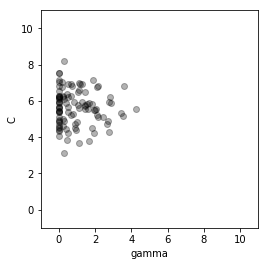

AUC for particle - 1 is 0.9236207697846197  At (gamma, c):  [1.00000000e-04 4.95631971e+00] .. Time =  0.10295629501342773
AUC for particle - 2 is 0.8808502527329144  At (gamma, c):  [0.1652551  7.05899548] .. Time =  0.11297726631164551
AUC for particle - 3 is 0.9246665307062268  At (gamma, c):  [1.00000000e-04 5.68575193e+00] .. Time =  0.09795928001403809
AUC for particle - 4 is 0.8717535929008183  At (gamma, c):  [0.27490361 4.87992394] .. Time =  0.13299083709716797
AUC for particle - 5 is 0.9236471022517533  At (gamma, c):  [1.00000000e-04 4.67301901e+00] .. Time =  0.10097217559814453
AUC for particle - 6 is 0.8236546867975835  At (gamma, c):  [1.85834    7.17490334] .. Time =  0.1369612216949463
AUC for particle - 7 is 0.8727500571984108  At (gamma, c):  [0.30541842 3.1518901 ] .. Time =  0.1430044174194336
AUC for particle - 8 is 0.8251094167224031  At (gamma, c):  [1.68269846 5.90631038] .. Time =  0.1340022087097168
AUC for particle - 9 is 0.832042241300542  At (gamma, c):  

AUC for particle - 71 is 0.8539789729139026  At (gamma, c):  [0.4730131 5.6531706] .. Time =  0.13998889923095703
AUC for particle - 72 is 0.8460151179237525  At (gamma, c):  [0.67890272 6.27309249] .. Time =  0.14200091361999512
AUC for particle - 73 is 0.875510317277575  At (gamma, c):  [0.24220304 5.02358408] .. Time =  0.12996888160705566
AUC for particle - 74 is 0.9236982701592419  At (gamma, c):  [1.00000000e-04 4.48670566e+00] .. Time =  0.10595893859863281
AUC for particle - 75 is 0.8404895716149688  At (gamma, c):  [0.89358943 4.51285574] .. Time =  0.136002779006958
AUC for particle - 76 is 0.8598202953850204  At (gamma, c):  [0.40770405 4.46950536] .. Time =  0.1359727382659912
AUC for particle - 77 is 0.8265856137773245  At (gamma, c):  [1.57624548 5.53984031] .. Time =  0.13797235488891602
AUC for particle - 78 is 0.8468823525541923  At (gamma, c):  [0.65141299 6.91594042] .. Time =  0.1279618740081787
AUC for particle - 79 is 0.9259642014699808  At (gamma, c):  [1.0000000

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 8 is [1.00000000e-04 7.52047744e+00] with AUC: 0.9260146208640797
13.496013879776001


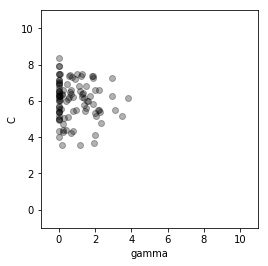

AUC for particle - 1 is 0.923646353738364  At (gamma, c):  [1.00000000e-04 4.95234293e+00] .. Time =  0.10699081420898438
AUC for particle - 2 is 0.89958920357152  At (gamma, c):  [0.079558   7.46878175] .. Time =  0.09599709510803223
AUC for particle - 3 is 0.9250988381230151  At (gamma, c):  [1.00000000e-04 6.25801469e+00] .. Time =  0.09598255157470703
AUC for particle - 4 is 0.8696058506847363  At (gamma, c):  [0.29021917 5.04931188] .. Time =  0.1300051212310791
AUC for particle - 5 is 0.9242073294372627  At (gamma, c):  [1.00000000e-04 5.38395014e+00] .. Time =  0.09499645233154297
AUC for particle - 6 is 0.8233738246914392  At (gamma, c):  [1.89529598 7.35017423] .. Time =  0.1299877166748047
AUC for particle - 7 is 0.8872609716785632  At (gamma, c):  [0.17717955 3.58318237] .. Time =  0.1149897575378418
AUC for particle - 8 is 0.8316588562510736  At (gamma, c):  [1.33497626 6.42037411] .. Time =  0.13495445251464844
AUC for particle - 9 is 0.8319656765676567  At (gamma, c):  [1

AUC for particle - 71 is 0.9086460576954706  At (gamma, c):  [0.05709072 6.25154918] .. Time =  0.08199524879455566
AUC for particle - 72 is 0.8459133434938177  At (gamma, c):  [0.6818191  6.58012855] .. Time =  0.13095831871032715
AUC for particle - 73 is 0.8931138961072187  At (gamma, c):  [0.11118176 5.53512151] .. Time =  0.10900497436523438
AUC for particle - 74 is 0.9245901531016889  At (gamma, c):  [1.00000000e-04 5.56925579e+00] .. Time =  0.10097360610961914
AUC for particle - 75 is 0.8462944830031175  At (gamma, c):  [0.68604377 4.21107123] .. Time =  0.1299588680267334
AUC for particle - 76 is 0.8763280681556528  At (gamma, c):  [0.24322118 4.70746939] .. Time =  0.12200665473937988
AUC for particle - 77 is 0.8322717483708503  At (gamma, c):  [1.2847181  6.23339701] .. Time =  0.13697409629821777
AUC for particle - 78 is 0.8480297007773867  At (gamma, c):  [0.61440195 7.44695967] .. Time =  0.12695837020874023
AUC for particle - 79 is 0.9259640143416336  At (gamma, c):  [1.0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


 9 is [1.00000000e-04 7.14389025e+00] with AUC: 0.9260153693774692
13.111042022705078


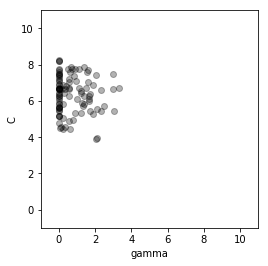

AUC for particle - 1 is 0.924692114659971  At (gamma, c):  [1.00000000e-04 5.65411624e+00] .. Time =  0.10499882698059082
AUC for particle - 2 is 0.9187429243921068  At (gamma, c):  [0.01076806 7.77247617] .. Time =  0.08297920227050781
AUC for particle - 3 is 0.925430119623258  At (gamma, c):  [1.00000000e-04 6.64142436e+00] .. Time =  0.09496188163757324
AUC for particle - 4 is 0.8754322555179105  At (gamma, c):  [0.22074208 5.81466345] .. Time =  0.1269690990447998
AUC for particle - 5 is 0.9244110654254794  At (gamma, c):  [1.00000000e-04 5.81664847e+00] .. Time =  0.10199117660522461
AUC for particle - 6 is 0.8237872847749891  At (gamma, c):  [2.04247309 7.43933779] .. Time =  0.1359553337097168
AUC for particle - 7 is 0.9188155594296972  At (gamma, c):  [0.02822241 4.7646892 ] .. Time =  0.08400464057922363
AUC for particle - 8 is 0.8252375236194717  At (gamma, c):  [1.67694286 6.25801885] .. Time =  0.13898754119873047
AUC for particle - 9 is 0.8307665990519317  At (gamma, c):  

AUC for particle - 71 is 0.9257363785547991  At (gamma, c):  [1.0000000e-04 6.7390338e+00] .. Time =  0.09598445892333984
AUC for particle - 72 is 0.8492319594750173  At (gamma, c):  [0.5622871  7.04097047] .. Time =  0.1359727382659912
AUC for particle - 73 is 0.9247425340540699  At (gamma, c):  [1.00000000e-04 6.03749411e+00] .. Time =  0.10099220275878906
AUC for particle - 74 is 0.9253029483679264  At (gamma, c):  [1.00000000e-04 6.39995005e+00] .. Time =  0.0959932804107666
AUC for particle - 75 is 0.8749745512757255  At (gamma, c):  [0.24544221 5.0452547 ] .. Time =  0.11995792388916016
AUC for particle - 76 is 0.8903558815682233  At (gamma, c):  [0.13730389 4.53742244] .. Time =  0.10898661613464355
AUC for particle - 77 is 0.8331137733042407  At (gamma, c):  [1.2176664  6.55090265] .. Time =  0.1299726963043213
AUC for particle - 78 is 0.8449407789948431  At (gamma, c):  [0.68076323 7.87499997] .. Time =  0.11997127532958984
AUC for particle - 79 is 0.9258622399116988  At (gamm

In [52]:
start = time()
while iteration < n_iterations:
    gbest_fitness_value_cadidate = np.array([0])
    gbest_position_cadidate = np.array([float('inf'), float('inf')])
    start1 = time()
    plot(particle_position_vector)
    
    for i in range(n_particles):
        start2 = time()
        fitness_cadidate = fitness_function(particle_position_vector[i])
        stop2 = time()
        print("AUC for particle -", i+1,"is", fitness_cadidate, " At (gamma, c): ", particle_position_vector[i], ".. Time = ", stop2 - start2)
        
        if(pbest_fitness_value[i] < fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value_cadidate < fitness_cadidate):
            gbest_fitness_value_cadidate = fitness_cadidate
            gbest_position_cadidate = particle_position_vector[i]
        
    print("The best position in iteration number", iteration + 1, "is", gbest_position_cadidate, "with AUC:", fitness_function(gbest_position_cadidate))
    
   # if(gbest_fitness_value < gbest_fitness_value_cadidate):
    #    gbest_fitness_value = gbest_fitness_value_cadidate
     #   gbest_position = gbest_position_cadidate
    #print("The best position so far is ", gbest_position, "in iteration number", iteration + 1, "with AUC:", fitness_function(gbest_position))
    
    for i in range(n_particles):
        new_velocity = khi*(velocity_vector[i] + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position_cadidate-particle_position_vector[i]))
        new_velocity = eval_velocity(new_velocity)
            
        particle_position_vector[i] = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = eval_position(particle_position_vector[i])
    
    iteration = iteration + 1
    stop1 = time()
    sec = stop1-start1
    print(sec)
stop = time()
print(stop - start)
